# IRIS - Connection I
---
![Concatenate Layer](https://github.com/DrKAI/image/blob/main/Concatenate%20Layer.png?raw=true)

In [1]:
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras

from sklearn.datasets import load_iris

## 데이터 불러오기

- iris.feature_names를 이용하여 판다스 데이터 프레임 만들기!

In [2]:
iris = load_iris()

In [4]:
df_x = pd.DataFrame(iris.data, columns=iris.feature_names)
df_x.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


In [6]:
y = iris.target

## train set, test set 구분하기

In [5]:
from sklearn.model_selection import train_test_split

In [7]:
train_x, test_x, train_y, test_y =\
    train_test_split(df_x, y, test_size=0.1, random_state=2023)

## **length끼리, width끼리**

In [11]:
train_x.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [12]:
train_x_length = train_x.loc[ : , ['sepal length (cm)', 'petal length (cm)'] ]
train_x_width = train_x.loc[ : , ['sepal width (cm)', 'petal width (cm)'] ]

In [ ]:
train_x_length.head()

In [ ]:
train_x_width.head()

In [16]:
train_x_length, train_x_width = np.array(train_x_length), np.array(train_x_width)

In [17]:
train_x_length.shape, train_x_width.shape

((135, 2), (135, 2))

## One-hot Encoding

In [18]:
from tensorflow.keras.utils import to_categorical

In [25]:
class_n = len(np.unique(train_y))

In [26]:
train_y = to_categorical(train_y, class_n)
test_y = to_categorical(test_y, class_n)

In [27]:
train_y.shape, test_y.shape

((135, 3), (15, 3))

## Modeling : multi-input & Concatenate layer

In [28]:
from tensorflow.keras.backend import clear_session
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Concatenate
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model

In [30]:
## Function API : 지금부터는 Sequential API 불가능!
# 1번 세션 클리어
clear_session()

# 2번 레이어 엮기
il_l = Input(shape=(2,), name='inputLength')
hl_l = Dense(2, activation='relu', name='hiddenLength')(il_l)

il_w = Input(shape=(2,), name='inputWidth')
hl_w = Dense(2, activation='relu', name='hiddenWidth')(il_w)

# 주의!
concat_l = Concatenate()([hl_l, hl_w])
ol = Dense(3, activation='softmax')(concat_l)

# 3번 모델 시작 끝 지정
model = Model([il_l, il_w], ol)

# 4번 컴파일 
model.compile(loss='categorical_crossentropy', metrics=['accuracy'],
              optimizer='adam')

# 요약
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 inputLength (InputLayer)       [(None, 2)]          0           []                               
                                                                                                  
 inputWidth (InputLayer)        [(None, 2)]          0           []                               
                                                                                                  
 hiddenLength (Dense)           (None, 2)            6           ['inputLength[0][0]']            
                                                                                                  
 hiddenWidth (Dense)            (None, 2)            6           ['inputWidth[0][0]']             
                                                                                              

## 모델 시각화

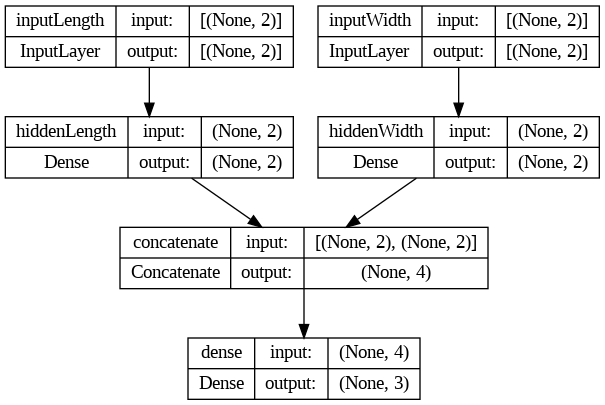

In [31]:
plot_model(model, show_shapes=True)

## 학습 시켜보기!

In [32]:
es = EarlyStopping(monitor='val_loss',
                   min_delta=0,
                   patience=10,
                   verbose=1,
                   restore_best_weights=True)

In [ ]:
model.fit([train_x_length, train_x_width], train_y, validation_split=0.1,
          epochs=1000, verbose=1, callbacks=[es])

---
---
---
---
---

# IRIS - Connection I practice

- 위의 코드를 **그대로** 따라서 코드 작성하기!

## 데이터 불러오기

- iris.feature_names를 이용하여 판다스 데이터 프레임 만들기!

In [34]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

import tensorflow as tf
from tensorflow import keras

In [35]:
iris = load_iris()

x = iris.data
y = iris.target

In [36]:
df_x = pd.DataFrame(x, columns=iris.feature_names)
df_x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## train set, test set 구분하기

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
train_x, test_x, train_y, test_y =\
    train_test_split(df_x, y, test_size=0.15, random_state=2023)

## **length끼리, width끼리**

In [39]:
train_x.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [43]:
tr_x_l = train_x[['sepal length (cm)', 'petal length (cm)']]
tr_x_w = train_x[['sepal width (cm)', 'petal width (cm)']]

tr_x_l.shape, tr_x_w.shape

((127, 2), (127, 2))

In [44]:
te_x_l = test_x[['sepal length (cm)', 'petal length (cm)']]
te_x_w = test_x[['sepal width (cm)', 'petal width (cm)']]

## One-hot Encoding

In [45]:
train_y.shape

(127,)

In [46]:
from tensorflow.keras.utils import to_categorical

In [48]:
class_n = len(set(train_y))

In [49]:
train_y = to_categorical(train_y, class_n)
test_y = to_categorical(test_y, class_n)

In [51]:
tr_x_l.shape, tr_x_w.shape, train_y.shape

((127, 2), (127, 2), (127, 3))

## Modeling : multi-input & Concatenate layer

In [56]:
## Functional API
# 1번 세션 클리어
keras.backend.clear_session()

# 2번 레이어 사슬처럼 엮기
il_l = keras.layers.Input(shape=(2,))
hl_l = keras.layers.Dense(8, activation='relu')(il_l)

il_w = keras.layers.Input(shape=(2,))
hl_w = keras.layers.Dense(8, activation='relu')(il_w)

cl = keras.layers.Concatenate()([hl_l, hl_w])
ol = keras.layers.Dense(3, activation='softmax')(cl)

# 3번 모델 시작과 끝 지정
model = keras.models.Model([il_l, il_w], ol)

# 4번 컴파일
model.compile(loss=keras.losses.categorical_crossentropy, metrics=['accuracy'],
              optimizer='adam')

# 요약
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 2)]          0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 2)]          0           []                               
                                                                                                  
 dense (Dense)                  (None, 8)            24          ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 8)            24          ['input_2[0][0]']                
                                                                                              

## 모델 시각화

In [57]:
from tensorflow.keras.utils import plot_model

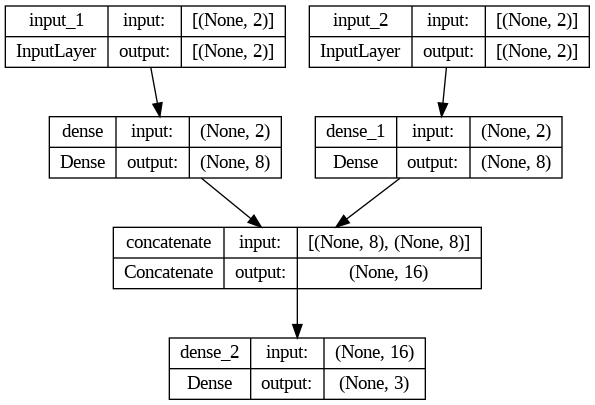

In [58]:
plot_model(model, show_shapes=True)

## 학습 시켜보기!

In [59]:
from tensorflow.keras.callbacks import EarlyStopping

In [60]:
es = EarlyStopping(monitor='val_loss',
                   min_delta=0,
                   patience=5,
                   verbose=1,
                   restore_best_weights=True)

In [61]:
model.fit([tr_x_l, tr_x_w], train_y, epochs=1000, verbose=1,
          callbacks=[es], validation_split=0.15)

Epoch 1/1000
4/4 [==============================] - 2s 89ms/step - loss: 2.2417 - accuracy: 0.6729 - val_loss: 2.1681 - val_accuracy: 0.7000
Epoch 2/1000
4/4 [==============================] - 0s 15ms/step - loss: 2.1412 - accuracy: 0.6729 - val_loss: 2.0679 - val_accuracy: 0.7000
Epoch 3/1000
4/4 [==============================] - 0s 15ms/step - loss: 2.0388 - accuracy: 0.6729 - val_loss: 1.9720 - val_accuracy: 0.7000
Epoch 4/1000
4/4 [==============================] - 0s 21ms/step - loss: 1.9445 - accuracy: 0.6729 - val_loss: 1.8803 - val_accuracy: 0.7000
Epoch 5/1000
4/4 [==============================] - 0s 20ms/step - loss: 1.8505 - accuracy: 0.6729 - val_loss: 1.7902 - val_accuracy: 0.7000
Epoch 6/1000
4/4 [==============================] - 0s 15ms/step - loss: 1.7595 - accuracy: 0.6729 - val_loss: 1.6996 - val_accuracy: 0.7000
Epoch 7/1000
4/4 [==============================] - 0s 16ms/step - loss: 1.6636 - accuracy: 0.6729 - val_loss: 1.6108 - val_accuracy: 0.7000
Epoch 8/1000


In [62]:
y_pred = model.predict([te_x_l, te_x_w])

1/1 [==============================] - 0s 119ms/step


In [63]:
y_pred[:5]

array([[3.5412259e-07, 2.1891581e-02, 9.7810811e-01],
       [4.6973946e-03, 9.5491678e-01, 4.0385786e-02],
       [5.0095897e-03, 9.3776131e-01, 5.7229016e-02],
       [7.8887388e-07, 5.8872811e-02, 9.4112635e-01],
       [8.8898308e-04, 8.2818180e-01, 1.7092913e-01]], dtype=float32)

In [64]:
test_y[:5]

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.]], dtype=float32)